### Exploratory Data Analysis

Dataset: Cardiovascular Disease dataset https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

In [171]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/Data Mining/cardio_train.csv', delimiter=';', index_col='id')

In [172]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


*Column 'age' is given as the patient's age in days, so we convert it to years*

In [173]:
df['age'] = df['age'] / 365
df['age'] = [int(age) for age in df['age']]

In [174]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


Features info:

Age | age | int (days)

Height | height | int (cm)

Weight | weight | float (kg)

Gender | gender | categorical code

Systolic blood pressure | ap_hi | int

Diastolic blood pressure | ap_lo | int

Cholesterol | cholesterol | 1: normal, 2: above normal, 3: well above normal

Glucose | gluc | 1: normal, 2: above normal, 3: well above normal

Smoking | smoke | binary

Alcohol intake | alco | binary

Physical activity | active | binary

Presence or absence of cardiovascular disease | Target Variable | cardio | binary

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


*No column has null/missing values*

In [176]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


As we can see, there are many outliers in the ap_hi and ap_lo columns (because blood pressure can not be negative or be as high as 16000), so we will drop the rows that contain these unusual values.

In [177]:
for index in df.index:
  if df.loc[index].ap_hi > 300 or df.loc[index].ap_hi < 30:
    df = df.drop(index=index)

In [178]:
for index in df.index:
  if df.loc[index].ap_lo > 300 or df.loc[index].ap_lo < 0:
    df = df.drop(index=index)

In [179]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52,2,168,76.0,120,80,1,1,1,0,1,0
99995,61,1,158,126.0,140,90,2,2,0,0,1,1
99996,52,2,183,105.0,180,90,3,1,0,1,0,1


### Visualizations

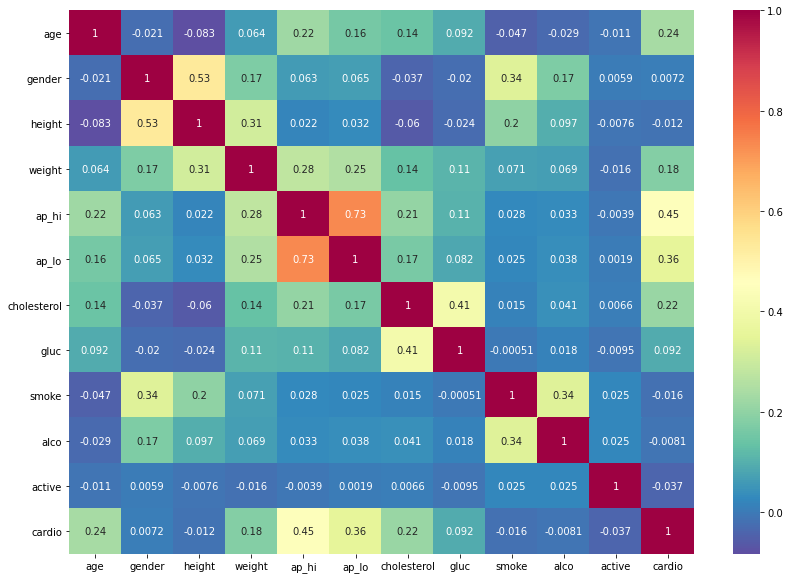

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,10))
cormat = df.corr(method='spearman')
sns.heatmap(cormat, cmap='Spectral_r', annot=True)
plt.show()

As we can see from the correlation matrix, ap_hi and ap_lo are strongly correlated between each other.

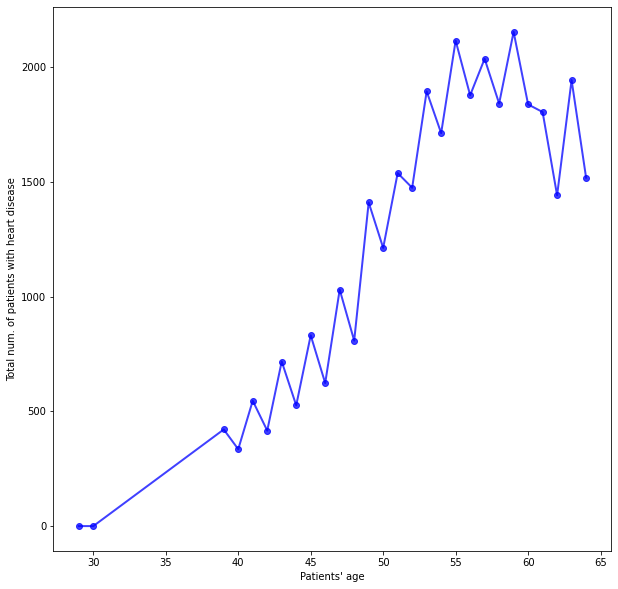

In [181]:
plt.figure(figsize=[10,10])
plt.plot(df.groupby('age').cardio.sum(), '-ob', linewidth='2', alpha=0.75)
plt.xlabel("Patients' age")
plt.ylabel('Total num. of patients with heart disease')
plt.show()

From here we can see that the age group in which most of the patients had heart disease is 53 to 60 years.

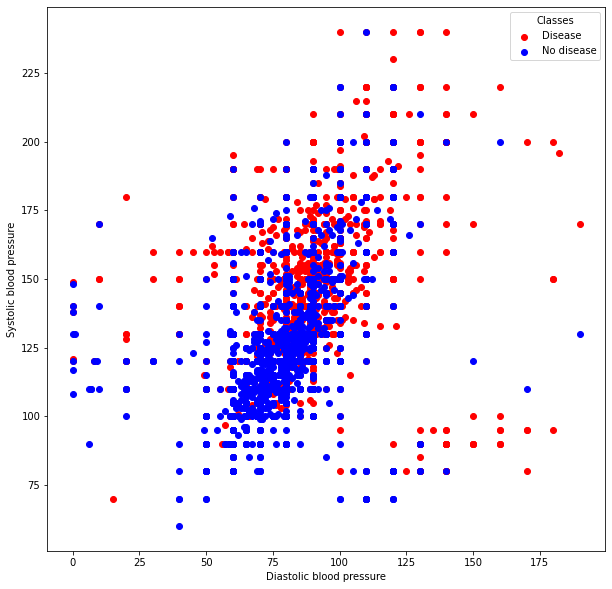

In [182]:
ap_lo_disease = df['ap_lo'].where(df['cardio']==1)
ap_lo_no_disease = df['ap_lo'].where(df['cardio']==0)
ap_hi_disease = df['ap_hi'].where(df['cardio']==1)
ap_hi_no_disease = df['ap_hi'].where(df['cardio']==0)

plt.figure(figsize=[10,10])
plt.scatter(ap_lo_disease, ap_hi_disease, c='red', label='Disease')
plt.scatter(ap_lo_no_disease, ap_hi_no_disease, c='blue', label='No disease')
plt.xlabel('Diastolic blood pressure')
plt.ylabel('Systolic blood pressure')
plt.legend(title='Classes')
plt.show()

From the above plot, although the classes are not clearly separated, it is obvious that most of the patients who had a heart disease also had higher blood pressure.

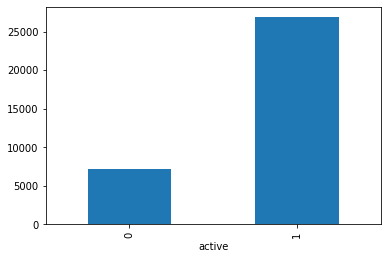

In [183]:
df.groupby('active').cardio.sum().plot.bar()

A non-expected pattern can be seen in the above graph: the number of patients that were physically active and got some kind of heart disease is significantly higher that those who were not active. However, we have to take into account that this is a subjective feature and many other factors contribute to this area, such as healthy diet and the intensity of the physical activity for example.

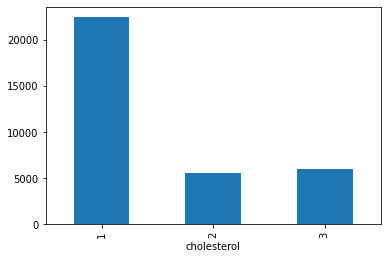

In [184]:
df.groupby('cholesterol').cardio.sum().plot.bar()

Classes: 1 - normal, 2 - above normal, 3 - well above normal

Although cholesterol plays a big role in cardiovascular diseases, we can see here that high cholesterol levels does not give significant information on whether the patient will get or will not get a heart disease. Most of the patients' cholesterol levels who had a heart disease were normal, although we can see that the number of the patients with high cholesterol levels who got a heart disease is still high.

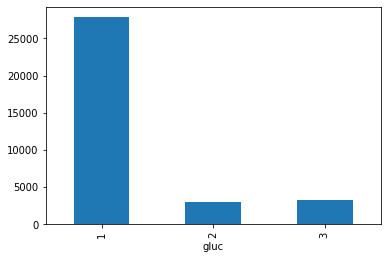

In [185]:
df.groupby('gluc').cardio.sum().plot.bar()

Similar like the cholesterol levels, but here the difference is more distinct. Most of the patients with a heart disease had normal level of glucose. The number of patients with higher than normal levels who had a heart disease is considerably smaller than those with normal levels, so we can assume that this attribute is not directly connected to getting a heart disease.

In [186]:
df.groupby('smoke').sum()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,alco,active,cardio
smoke,,,,,,,,,,,
0,3322130,81509,10286341,4633645.2,7938360,5100376,85526,77011,1873,50230,31220
1,313570,11314,1025258,467501.3,775513,497261,8395,7359,1818,5062,2838


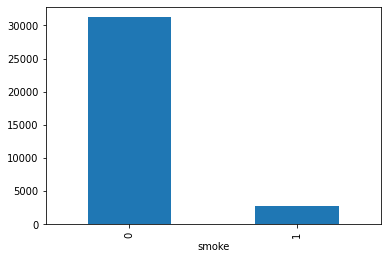

In [187]:
df.groupby('smoke').cardio.sum().plot.bar()

From the above graph we can see that smoking is not a direct factor in getting a heart disease. In fact, only a small number of people who had a heart disease were actively smoking.

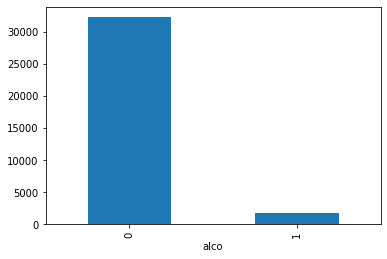

In [188]:
df.groupby('alco').cardio.sum().plot.bar()

The same applies for drinking alcohol.

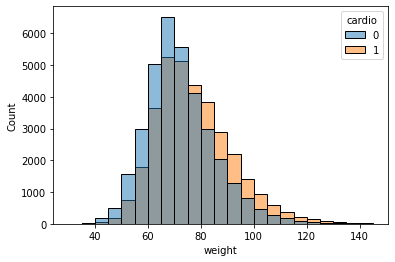

In [189]:
sns.histplot(df, x='weight', bins = range(30,150,5), hue='cardio')

Total number of patients who either had or did not have a heart disease and their weight distribution. We can see that people who had a heart disease tend to have a higher body weight than those who didn't.

### Feature Engineering

Because weight only is not a reliable attribute (height also determines if you are overweight or not), we will add a new attribute to the dataset, body mass index, which calculates the ratio between height and weight using the formula:
  BMI = weight(kg) / height(m) ^ 2

In [190]:
import numpy as np

df['bmi'] = df['weight'] / np.power((df['height'] / 100), 2)

In [191]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


### Dataset Preparation

In [192]:
X = df[['age', 'ap_hi', 'ap_lo', 'cholesterol', 'bmi', 'gluc']]
y = df.cardio

We will train the ML models using a subset of the most significant features from the dataset.

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
X_train.head()

,age,ap_hi,ap_lo,cholesterol,bmi,gluc
id,,,,,,
37480,64,150,90,2,28.710479,1
62719,53,120,80,3,25.559329,3
27642,60,120,80,1,23.875115,1
36814,61,130,90,2,23.711845,1
3032,60,130,90,2,26.566840,1


In [195]:
y_train.head()

id
37480    1
62719    0
27642    0
36814    1
3032     1
Name: cardio, dtype: int64

Data scaling

In [196]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimensionality reduction

In [197]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### Decision Tree Classifiers

In [198]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [199]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[4725 2254]
 [2601 4185]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      6979
           1       0.65      0.62      0.63      6786

    accuracy                           0.65     13765
   macro avg       0.65      0.65      0.65     13765
weighted avg       0.65      0.65      0.65     13765

0.6472938612422812


In [200]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300, max_depth=40, max_samples=30)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7280058118416273

Random Forest gives a much better prediction than a Decision Tree Classifier

### Naive Bayes Classifier

In [201]:
df.groupby('cardio').count()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
cardio,,,,,,,,,,,,
0,34764,34764,34764,34764,34764,34764,34764,34764,34764,34764,34764,34764
1,34058,34058,34058,34058,34058,34058,34058,34058,34058,34058,34058,34058


The classes are balanced, so there is no need to give the model prior probabilities for them.

In [202]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, cross_val_predict

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7089720305121685

Cross validation prediction

In [203]:
scores = cross_validate(nb, X, y, cv=20, scoring='f1_macro')
scores

{'fit_time': array([0.01779723, 0.01664996, 0.01664042, 0.01691008, 0.01792741,
        0.01794553, 0.01706767, 0.01711488, 0.01701593, 0.02109718,
        0.01716971, 0.01975322, 0.01679993, 0.01812005, 0.01711798,
        0.01683259, 0.01677227, 0.0222981 , 0.01741314, 0.01937652]),
 'score_time': array([0.00324726, 0.00311232, 0.00317764, 0.00363255, 0.00393224,
        0.0031786 , 0.00319433, 0.00319576, 0.00445223, 0.00322127,
        0.00318623, 0.00324774, 0.00333214, 0.00320387, 0.00320315,
        0.00325012, 0.00332355, 0.0032568 , 0.00323009, 0.00323439]),
 'test_score': array([0.70434302, 0.70200906, 0.70194204, 0.70867637, 0.70116756,
        0.71445596, 0.70054764, 0.70840325, 0.70315024, 0.70503016,
        0.70379037, 0.7091476 , 0.70069504, 0.7084116 , 0.72181112,
        0.69962392, 0.69548547, 0.70765845, 0.70135124, 0.7029267 ])}

In [204]:
y_pred = cross_val_predict(nb, X, y, cv=50)
accuracy_score(y, y_pred)

0.7092790096190171

We can see that cross validation prediction does not affect the accuracy.

### KNN Classification

In [205]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=80)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=80, p=2,
                     weights='uniform')

In [206]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.7276425717399201

Text(0, 0.5, 'Mean Error')

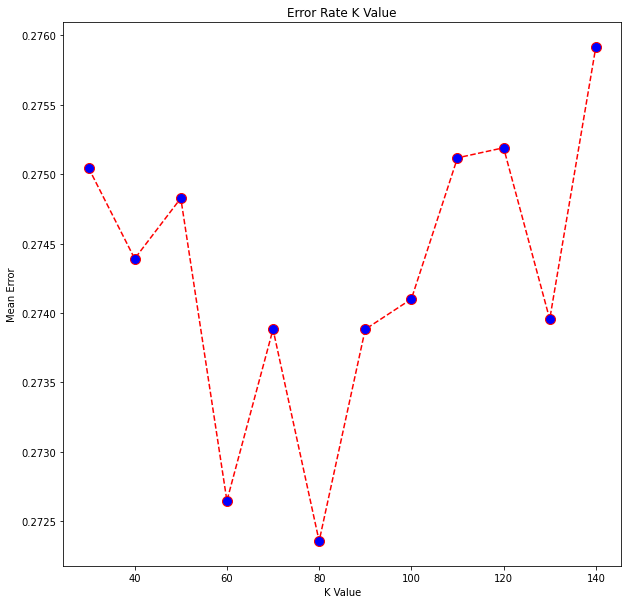

In [207]:
import numpy as np

error = []

for i in range(30, 150, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != np.array(list(y_test))))

plt.figure(figsize=(10, 10))
plt.plot(range(30, 150, 10), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the error rate we can see that the optimum value for k is 80.

### Logistic Regresion 

In [208]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7266981474754813

In [209]:
print(confusion_matrix(y_test, y_pred))

[[5484 1495]
 [2267 4519]]


In [210]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.74      6979
           1       0.75      0.67      0.71      6786

    accuracy                           0.73     13765
   macro avg       0.73      0.73      0.73     13765
weighted avg       0.73      0.73      0.73     13765



### Ensemble methods - XGBoost

Training a XGBoost model using xgboost.train method and the XGBClassifier wrapper 

In [218]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=30, n_jobs=-1, verbose=1, learning_rate=0.16)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy_score(y_test, y_pred)

0.6999636759898292

In [165]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

param = {"booster":"gbtree", "objective":"binary:logistic","seed":1,
         "max_depth":4, "alpha":0.0}

progress = dict()
model = xgb.train(params = param, dtrain = data_dmatrix, 
                  num_boost_round = 20, verbose_eval=1, evals_result=progress)

In [166]:
y_pred = model.predict(xgb.DMatrix(data=X_test, label=y_test))

In [167]:
accuracy_score(y_test, np.round(y_pred))

0.7357065019978205

### Neural Networks

Training a neural network model with 3 hidden layers using the Exponential Linear Unit (ELU) as an activation function.

In [169]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=6, kernel_initializer = 'uniform', activation='elu'))
model.add(Dense(16,kernel_initializer = 'uniform', activation='elu'))
model.add(Dense(8,kernel_initializer = 'uniform', activation='elu'))
model.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy']) 

model.fit(X_train, y_train, epochs=10, batch_size=10) 

Epoch 1/10
5506/5506 [==============================] - 10s 2ms/step - loss: 0.6208 - accuracy: 0.6440
Epoch 2/10
5506/5506 [==============================] - 8s 2ms/step - loss: 0.5614 - accuracy: 0.7186
Epoch 3/10
5506/5506 [==============================] - 8s 1ms/step - loss: 0.5622 - accuracy: 0.7201
Epoch 4/10
5506/5506 [==============================] - 8s 1ms/step - loss: 0.5591 - accuracy: 0.7178
Epoch 5/10
5506/5506 [==============================] - 8s 1ms/step - loss: 0.5585 - accuracy: 0.7215
Epoch 6/10
5506/5506 [==============================] - 8s 1ms/step - loss: 0.5580 - accuracy: 0.7232
Epoch 7/10
5506/5506 [==============================] - 8s 1ms/step - loss: 0.5556 - accuracy: 0.7247
Epoch 8/10
5506/5506 [==============================] - 8s 1ms/step - loss: 0.5559 - accuracy: 0.7231
Epoch 9/10
5506/5506 [==============================] - 8s 1ms/step - loss: 0.5549 - accuracy: 0.7247
Epoch 10/10
5506/5506 [==============================] - 8s 1ms/step - loss: 0.55

In [170]:
y_pred = model.predict(X_test)
accuracy_score(y_test, np.round(y_pred))

0.7274972756992372